<a href="https://colab.research.google.com/github/dmuman/ML-projects-and-tutorials/blob/main/Pandas/Tutorials/pandas_tutorial_ukr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Про Pandas

Бібліотека `pandas` надає доступ до швидких та простих у використанні структур даних та інструментів аналізу даних. Головна структура даних - це `DataFrame`, про яку можна думати як про двовимірну (2D) таблицю в пам'яті (in-memory 2D table), схоже на таблицю Excel, з іменами колонок та підписами (labels) рядків. Багато функцій, які є в Excel, можна реалізувати і програмно, кодом. Наприклад, для створення зведених таблиць (pivot tables), обчислювання стовпців на основі інших стовпців, побудови графіків тощо. Також можна групувати рядки за значеннями стовпців або об'єднувати таблиці, як в SQL. Pandas також чудово працює з часовими рядами (time series).

# Налаштування

Для початку `pandas` треба імпортувати. Зазвичай, його імпортують як `pd`:

In [1]:
import pandas as pd

# Об'єкти `Series`

Бібліотека pandas містить наступні корисні структури даних:
* об'єкти `Series`. Це одновимірні (1D) масиви, схожі до колонок в електронних таблицях (spreadsheet, з іменем колонки та лейблами рядків).
* об'єкти `DataFrame`. Це двовимірні (2D) таблиці, схожі на електронні таблиці (spreadsheet, з іменами колонок та лейблами рядків).
* об'єкти `Panel`. Про `Panel` можна думати, як про словник (dictionary) `DataFrame`ів. Вони використовуються не дуже часто.

## Створення `Series`

Почнімо зі створення нашого першого об'єкту `Series`

In [2]:
s = pd.Series([2, -1, 3, 5])
s

,0
0,2
1,-1
2,3
3,5


## Схожість з одновимірним `ndarray`

Об'єкти `Series` ведуть себе дуже схоже до одновимірних масивів з NumPy - `ndarray`. Їх навіть можна надавати як параметри для функцій NumPy.

In [3]:
import numpy as np
np.exp(s)

,0
0,7.389056
1,0.367879
2,20.085537
3,148.413159


Проведення арифметичних операцій над `Series` також можливі, і виконуються вони поелементно, як і над `ndarray`:

In [4]:
s + [1000, 2000, 3000, 4000]

,0
0,1002
1,1999
2,3003
3,4005


Схоже до NumPy, якщо додати лише одне число до `Series`, це число буде додано до всіх елементів в `Series`. Це називається **бродкастином (broadcasting)**:

In [5]:
s + 1000

,0
0,1002
1,999
2,1003
3,1005


Це також справджується і для всіх бінарних операцій, як от `*` або `/`, а також і для умовних операцій:

In [6]:
s < 0

,0
0,False
1,True
2,False
3,False


## Індексні позначки (index labels)

Кожен елемент в об'єкті `Series` має свій унікальний ідентифікатор, який називається *індексною позначкою (index label)*. За замовчуванням, це просто ранг елементу в `Series` (починаючи з `0`), але індекти можна зробити і вручну:

In [7]:
s2 = pd.Series([68, 83, 112, 68], index=['alice', 'bob', 'charles', 'darwin'])
s2

,0
alice,68
bob,83
charles,112
darwin,68


Завдяки цьому, `Series` можна використовувати так само, як і `dict`:

In [8]:
s2['bob']

83

Щоб було зрозуміліше, коли ти отримуєш доступ по *label* або по *integer location*, рекомендовано завжди використовувати атрибут `loc` коли по `label` та `iloc`, якщо по *integer location*

In [9]:
s2.loc['bob']

83

In [10]:
s2.iloc[1]

83

Розділення (slicing) `Series` також ділить і index labels:

In [11]:
s2.iloc[1:3]

,0
bob,83
charles,112


Це може призвести до неочікуваних результатів, якщо використовуються нумеровані лейбли (numeric labels) за замовчуванням, тому треба бути обережним:

In [12]:
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise

,0
0,1000
1,1001
2,1002
3,1003


In [13]:
surprise_slice = surprise[2:]
surprise_slice

,0
2,1002
3,1003


Що ми маємо. Перший елемент має індекс `2`. Елементу з індексом `0` немає в розрізі (slice).

In [14]:
try:
  surprise_slice[0]
except KeyError as e:
  print("Key error:", e)

Key error: 0


Але варто запам'ятати, що отримати доступ до елементів по *integer location* можна за допомогою атрибуту `iloc`. Це демонструє ще одну причину, чому завжди краще користуватись `loc` та `iloc` для доступу в об'єкті `Series`:

In [15]:
surprise_slice.iloc[0]

1002

## Ініціалізація зі словника (init from `dict`)

Об'єкт `Series` можна створити з `dict`. Ключі будуть використані як *index labels*:

In [16]:
weights = {'alice': 68, 'bob': 83, 'colin': 86, 'darwin': 68}
s3 = pd.Series(weights)
s3

,0
alice,68
bob,83
colin,86
darwin,68


Можна контролювати, який елемент хочеться додати в `Series`, а також в якому порядку, явно (explicitly) специфікуючи бажаний `index`:

In [17]:
s4 = pd.Series(weights, index = ['colin', 'alice'])
s4

,0
colin,86
alice,68


## Автоматичне вирівнювання (automatic alignment)

Коли операція включає в себе декілька об'єктів `Series`, `pandas` автоматично вирівнює (aligns) елементи, зіставляючи (by matching) index labels.

In [18]:
print(s2.keys())
print(s3.keys())

s2 + s3

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')


,0
alice,136.0
bob,166.0
charles,NaN
colin,NaN
darwin,136.0


`Series`, яка вийшла в результаті, містить в собі об'єднання (union) з index labels з `s2` та `s3`. Оскільки `"colin"` немає в `s2` і `"charles"` немає в `s3`, ці елементи матимуть результуюче значення `NaN` (Not-a-Number означає, що *значення немає*).

Автоматичне вирівнювання дуже стає у нагоді при роботі з даними, які надходять з різних джерел з різною стуктурою та відсутніми елементами. Але якщо ви забудете встановити правильні index labels, можна отримати незвичайні результати:



In [19]:
s5 = pd.Series([1000, 1000, 1000, 1000])

# або
# arr = np.ones(4, dtype='int64')*1000
# s5 = pd.Series(arr)

print("s2 =", s2.values)
print("s5 =", s5.values)

s2 + s5

s2 = [ 68  83 112  68]
s5 = [1000 1000 1000 1000]


,0
alice,NaN
bob,NaN
charles,NaN
darwin,NaN
0,NaN
1,NaN
2,NaN
3,NaN


Pandas не може вирівняти `Series`, оскільки їхні лейбли взагалі не збігаються, звідси й усі `NaN` результати.

## Ініціалізація зі скаляром (init with a scalar)

Об'єкт `Series` можна ініціалізувати використовуючи скаляр та список з index labels: всі елементи будуть встановлені до скаляра.

*Скаляр - це число.*

In [20]:
meaning = pd.Series(42, ['life', 'universe', 'everything'])
meaning

,0
life,42
universe,42
everything,42


## Назва, ім'я `Series`

`Series` може мати `name`:

In [21]:
s6 = pd.Series([83, 68], index=['bob', 'alice'], name='weights')
s6

,weights
bob,83
alice,68


## Побудова графіка (plotting) `Series`

Pandas робить легким побудову графіка з даними `Series`, вокристовуючи matplotlib. Треба просто імпортувати matplotlib та викликати метод `plot()`:

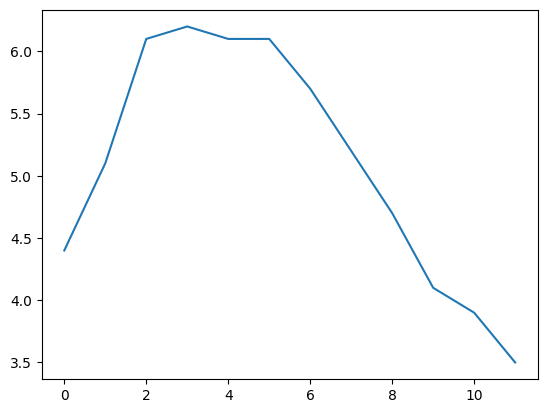

In [22]:
import matplotlib.pyplot as plt
temperatures = [4.4, 5.1, 6.1, 6.2, 6.1, 6.1, 5.7, 5.2, 4.7, 4.1, 3.9, 3.5]
s7 = pd.Series(temperatures, name='Temperatures')
s7.plot()
plt.show()

Існує *багато* різних опцій для побудови графіків даних. Щоб подивитись, які типи графіків доступні в pandas, можна перейти до секції [Візуалізація](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) в офіційній документації.

# Керування часом (handling time)

Багато наборів даних (datasets) мають часові мітки (timestamps), і pandas чудово підходить для маніпуляції такими даними:
* він може репрезентувати періоди (як от 2016Q3) та частоту (як от "monthly"),
* він може конвертувати періоди на фактичні часові мітки та навпаки,
* він може повторно зібрати дані та агрегувати значення як заманеться,
* а також може оперувати часовими зонами.

## Часовий діапазон

Почнімо зі створення часового ряду використовуючи `pd.date_range()`. Він повертає `DatetimeIndex`, який містить одну дату за годину (datetime per hour) протягом 12 годин, починаючи з 1 вересня 2024 року о 17:30.

In [23]:
dates = pd.date_range('2024/09/01 5:30pm', periods=12, freq='h')
dates

DatetimeIndex(['2024-09-01 17:30:00', '2024-09-01 18:30:00',
               '2024-09-01 19:30:00', '2024-09-01 20:30:00',
               '2024-09-01 21:30:00', '2024-09-01 22:30:00',
               '2024-09-01 23:30:00', '2024-09-02 00:30:00',
               '2024-09-02 01:30:00', '2024-09-02 02:30:00',
               '2024-09-02 03:30:00', '2024-09-02 04:30:00'],
              dtype='datetime64[ns]', freq='H')

Цей `DatetimeIndex` можна використати як індекс в `Series`:

In [24]:
temp_series = pd.Series(temperatures, dates)
temp_series

,0
2024-09-01 17:30:00,4.4
2024-09-01 18:30:00,5.1
2024-09-01 19:30:00,6.1
2024-09-01 20:30:00,6.2
2024-09-01 21:30:00,6.1
2024-09-01 22:30:00,6.1
2024-09-01 23:30:00,5.7
2024-09-02 00:30:00,5.2
2024-09-02 01:30:00,4.7
2024-09-02 02:30:00,4.1


Тепер можна побудувати графік цього ряду:

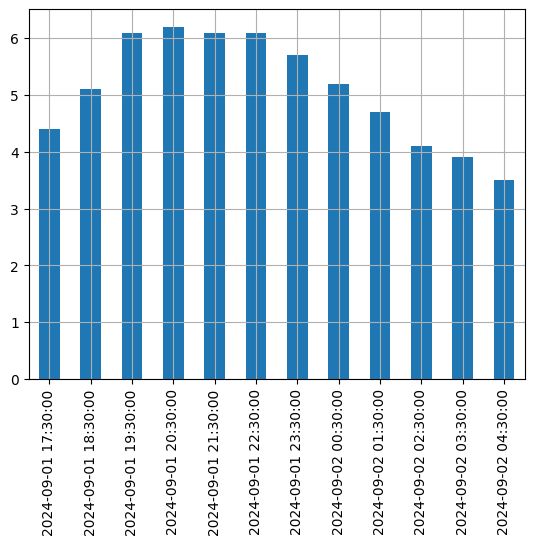

In [25]:
temp_series.plot(kind='bar')

plt.grid(True)
plt.show()

## Повторна вибірка (resampling)

Pandas дозволяє дуже легко зробити повторну вибірку часового ряду. Можна просто викликати метод `resample()` та уточнити нову частоту:

In [26]:
temp_series_freq_2h = temp_series.resample('2h')
temp_series_freq_2h

Операція повторної вибірки насправді є відкладеною (deferred) операцією, тому ми отримали не об'єкт `Series`, а об'єкт `DatetimeIndexResampler`. Щоб насправді виконати операцію повторної вибірки, можна просто викликати метод `mean()`. Pandas порахує середнє значення кожної пари послідовних годин (consecutive hours).

In [27]:
temp_series_freq_2h = temp_series_freq_2h.mean()

Тепер можна побудувати графік результату:

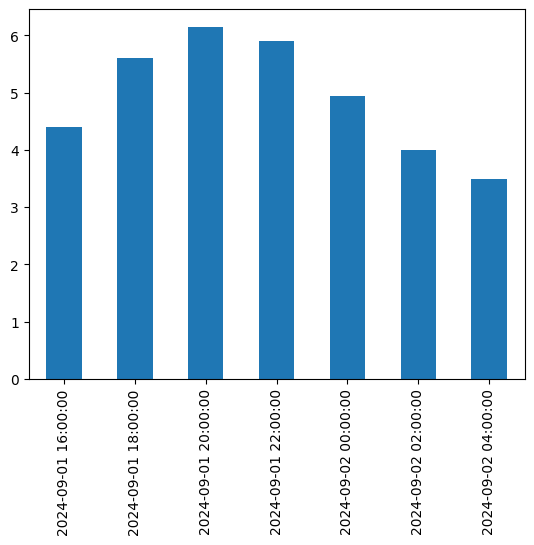

In [28]:
temp_series_freq_2h.plot(kind='bar')
plt.show()

Варто зазначити, що значення було автоматично агреговано (aggregated) в двогодинні періоди. Якщо ми подивимось на період 6-8pm, наприклад, ми мали значення `5.1` о 6:30pm та `6.1` о 7:30pm. Після повторної вибірки, ми маємо лише одне значення 5.6, яке є середнім значенням між `5.1` та `6.1`. Замість обрахування середнього значення, ми могли б використати будь-яку іншу функцію агрегування. Наприклад, ми можемо вирішити зберегти мінімальне значення кожного періоду:

In [29]:
temp_series_freq_2h = temp_series.resample('2h').min()
temp_series_freq_2h

,0
2024-09-01 16:00:00,4.4
2024-09-01 18:00:00,5.1
2024-09-01 20:00:00,6.1
2024-09-01 22:00:00,5.7
2024-09-02 00:00:00,4.7
2024-09-02 02:00:00,3.9
2024-09-02 04:00:00,3.5


Або, так само, можна використати метод `apply()`:

In [30]:
temp_series_freq_2h = temp_series.resample('2h').apply('min')
temp_series_freq_2h

,0
2024-09-01 16:00:00,4.4
2024-09-01 18:00:00,5.1
2024-09-01 20:00:00,6.1
2024-09-01 22:00:00,5.7
2024-09-02 00:00:00,4.7
2024-09-02 02:00:00,3.9
2024-09-02 04:00:00,3.5


## Підвищення вибірки та інтерполяція (upsampling and interpolation)

То був приклад зменшення вибірки (downsampling). Ми можемо також і підвищити вибірку (upsample). Наприклад, підвищити частоту, але це створить дірки в наших даних:

In [31]:
temp_series_freq_15min = temp_series.resample('15min').mean()
temp_series_freq_15min.head(n=10) # `head` показує перші n значень

,0
2024-09-01 17:30:00,4.4
2024-09-01 17:45:00,NaN
2024-09-01 18:00:00,NaN
2024-09-01 18:15:00,NaN
2024-09-01 18:30:00,5.1
2024-09-01 18:45:00,NaN
2024-09-01 19:00:00,NaN
2024-09-01 19:15:00,NaN
2024-09-01 19:30:00,6.1
2024-09-01 19:45:00,NaN


Одне вирішення - це заповнити пропуски за допомогою інтерполяції. Ми можемо просто викликати метод `interpolate()`. За замовчуванням використовується лінійна інтерполяція, але можна також обрати інший метод, як от кубічна інтерполяція:

In [32]:
temp_series_freq_15min = temp_series.resample('15min').interpolate(method='cubic')
temp_series_freq_15min.head(n=10)

,0
2024-09-01 17:30:00,4.400000
2024-09-01 17:45:00,4.452911
2024-09-01 18:00:00,4.605113
2024-09-01 18:15:00,4.829758
2024-09-01 18:30:00,5.100000
2024-09-01 18:45:00,5.388992
2024-09-01 19:00:00,5.669887
2024-09-01 19:15:00,5.915839
2024-09-01 19:30:00,6.100000
2024-09-01 19:45:00,6.203621


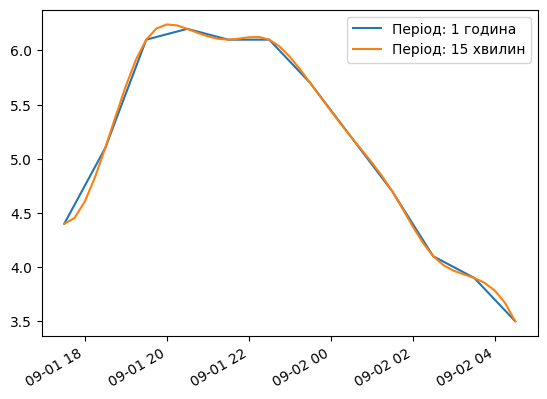

In [33]:
temp_series.plot(label='Період: 1 година')
temp_series_freq_15min.plot(label='Період: 15 хвилин')
plt.legend()
plt.show()

## Часові зони (timezones)

За замовчуванням, datetimes *наївні (naive)*: вони не знають про часові зони, тому 2024-09-01 02:30 може значити 1 вересня о 2:30am в Парижі або Нью-Йорку. Ми можемо зробити так, що datetimes будуть знати про часові зони, просто викликавши метод `tz_localize()`.

In [34]:
temp_series_ny = temp_series.tz_localize('America/New_York')
temp_series_ny

,0
2024-09-01 17:30:00-04:00,4.4
2024-09-01 18:30:00-04:00,5.1
2024-09-01 19:30:00-04:00,6.1
2024-09-01 20:30:00-04:00,6.2
2024-09-01 21:30:00-04:00,6.1
2024-09-01 22:30:00-04:00,6.1
2024-09-01 23:30:00-04:00,5.7
2024-09-02 00:30:00-04:00,5.2
2024-09-02 01:30:00-04:00,4.7
2024-09-02 02:30:00-04:00,4.1


Можна помітити, що `-04:00` з'явилось у всіх datetimes. Це означає, що всі ці datetimes посилаються на **UTC - 4 години**.

Можна конвертувати ці datetimes на час Парижу наступним чином:

In [35]:
temp_series_paris = temp_series_ny.tz_convert('Europe/Paris')
temp_series_paris

,0
2024-09-01 23:30:00+02:00,4.4
2024-09-02 00:30:00+02:00,5.1
2024-09-02 01:30:00+02:00,6.1
2024-09-02 02:30:00+02:00,6.2
2024-09-02 03:30:00+02:00,6.1
2024-09-02 04:30:00+02:00,6.1
2024-09-02 05:30:00+02:00,5.7
2024-09-02 06:30:00+02:00,5.2
2024-09-02 07:30:00+02:00,4.7
2024-09-02 08:30:00+02:00,4.1


Використаємо приклад з датою, коли Франція переводить годинник:

In [36]:
dates_2016 = pd.date_range('2016/10/29 5:30pm', periods=12, freq='h')
temp_series_2016 = pd.Series(temperatures, dates_2016)
temp_series_ny_2016 = temp_series_2016.tz_localize("America/New_York")
temp_series_paris_2016 = temp_series_ny_2016.tz_convert("Europe/Paris")
temp_series_paris_2016

,0
2016-10-29 23:30:00+02:00,4.4
2016-10-30 00:30:00+02:00,5.1
2016-10-30 01:30:00+02:00,6.1
2016-10-30 02:30:00+02:00,6.2
2016-10-30 02:30:00+01:00,6.1
2016-10-30 03:30:00+01:00,6.1
2016-10-30 04:30:00+01:00,5.7
2016-10-30 05:30:00+01:00,5.2
2016-10-30 06:30:00+01:00,4.7
2016-10-30 07:30:00+01:00,4.1


Тепер можна помітити, що доданок UTC змінюється з `+02:00` на `+01:00`. Це тому, що Франція змінює час на зимній о 03:00 саме цієї ночі (час переходить назад до 02:00). Через це 02:30 з'являється двічі! Можна повернутись до наївної репрезентації (якщо ви реєструєте деякі дані погодинно, використовуючи місцевий час, без збереження часового поясу, ви можете отримати щось на кшталт цього):

In [37]:
temp_series_paris_2016_naive = temp_series_paris_2016.tz_localize(None)
temp_series_paris_2016_naive

,0
2016-10-29 23:30:00,4.4
2016-10-30 00:30:00,5.1
2016-10-30 01:30:00,6.1
2016-10-30 02:30:00,6.2
2016-10-30 02:30:00,6.1
2016-10-30 03:30:00,6.1
2016-10-30 04:30:00,5.7
2016-10-30 05:30:00,5.2
2016-10-30 06:30:00,4.7
2016-10-30 07:30:00,4.1


Тепер `02:30` став неоднозначним. Якщо ми спробуємо локалізувати ці ніївні datetimes то часової зони Парижу, то отримаємо помилку:

In [38]:
try:
  temp_series_paris_2016_naive.tz_localize('Europe/Paris')
except Exception as e:
  print(type(e))
  print(e)

<class 'pytz.exceptions.AmbiguousTimeError'>
Cannot infer dst time from 2016-10-30 02:30:00, try using the 'ambiguous' argument


На щастя, використовуючи аргумент `ambiguous` ми можемо сказати Pandas зробити правильний висновок (infer) про літній час (DTS - Daylight Saving Time) на основі порядку неоднозначних міток часу (ambiguous timastamps):

In [39]:
temp_series_paris_2016_naive.tz_localize('Europe/Paris', ambiguous='infer')

,0
2016-10-29 23:30:00+02:00,4.4
2016-10-30 00:30:00+02:00,5.1
2016-10-30 01:30:00+02:00,6.1
2016-10-30 02:30:00+02:00,6.2
2016-10-30 02:30:00+01:00,6.1
2016-10-30 03:30:00+01:00,6.1
2016-10-30 04:30:00+01:00,5.7
2016-10-30 05:30:00+01:00,5.2
2016-10-30 06:30:00+01:00,4.7
2016-10-30 07:30:00+01:00,4.1


## Періоди

Функція `pd.period_range()` повертає `PeriodIndex` замість `DatetimeIndex`. Наприклад, візьмемо всі квартали у 2023 та 2024:

In [40]:
quarters = pd.period_range('2023Q1', periods=8, freq='Q')
quarters

PeriodIndex(['2023Q1', '2023Q2', '2023Q3', '2023Q4', '2024Q1', '2024Q2',
             '2024Q3', '2024Q4'],
            dtype='period[Q-DEC]')

Додавання числа `N` до `PeriodIndex` зміщує період на `N` $\times$ частота `PeriodIndex`:

In [41]:
quarters + 3

PeriodIndex(['2023Q4', '2024Q1', '2024Q2', '2024Q3', '2024Q4', '2025Q1',
             '2025Q2', '2025Q3'],
            dtype='period[Q-DEC]')

Метод `asfreq()` дозволяє змінити частоту `PeriodIndex`. Всі періоди буде подовжено або скорочено відповідно. Наприклад, конвертуємо всі квартали до місячних періодів (зумування, zooming in):

In [42]:
quarters.asfreq('M')

PeriodIndex(['2023-03', '2023-06', '2023-09', '2023-12', '2024-03', '2024-06',
             '2024-09', '2024-12'],
            dtype='period[M]')

За замовчуванням, `asfreq` масштабує в кінці кожного періоду. Ми можемо сказати йому збільшувати масштаб на початку кожного періоду:

In [43]:
quarters.asfreq('M', how='start')

PeriodIndex(['2023-01', '2023-04', '2023-07', '2023-10', '2024-01', '2024-04',
             '2024-07', '2024-10'],
            dtype='period[M]')

Також можна зменшити масштаб:

In [44]:
quarters.asfreq('Y')

PeriodIndex(['2023', '2023', '2023', '2023', '2024', '2024', '2024', '2024'], dtype='period[A-DEC]')

Звичайно ж можна зробити `Series` з `PeriodIndex`:

In [45]:
quarterly_revenue = pd.Series([300, 320, 290, 390, 320, 360, 310, 410], index=quarters)
quarterly_revenue

,0
2023Q1,300
2023Q2,320
2023Q3,290
2023Q4,390
2024Q1,320
2024Q2,360
2024Q3,310
2024Q4,410


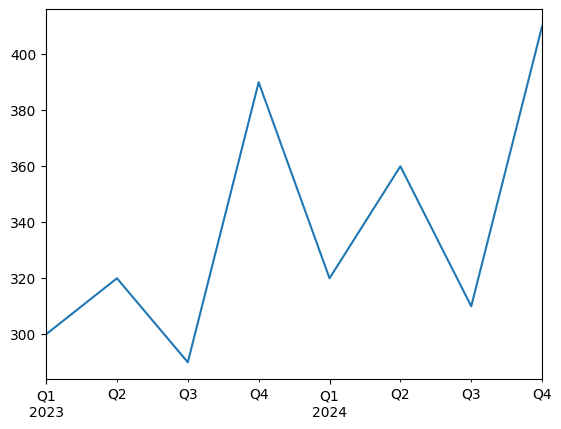

In [46]:
quarterly_revenue.plot(kind='line')
plt.show()

Можна перетворити періоди в часові мітки (timestamps), викликавши `to_timestamp`. За замовчуванням, це дасть нам перший день кожного періоду, але встановивши `how` та `freq`, ми можемо отримати останню годину кожного періодну:

In [47]:
last_hours = quarterly_revenue.to_timestamp(how='end', freq='h')
last_hours

,0
2023-03-31 23:59:59.999999999,300
2023-06-30 23:59:59.999999999,320
2023-09-30 23:59:59.999999999,290
2023-12-31 23:59:59.999999999,390
2024-03-31 23:59:59.999999999,320
2024-06-30 23:59:59.999999999,360
2024-09-30 23:59:59.999999999,310
2024-12-31 23:59:59.999999999,410


І назад в періоди, викликавши `to_period`:

In [48]:
last_hours.to_period()

,0
2023Q1,300
2023Q2,320
2023Q3,290
2023Q4,390
2024Q1,320
2024Q2,360
2024Q3,310
2024Q4,410


Pandas також надає багато інших функцій, які відносяться до часу. Їх можна переглянути в [документації](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html). Наприклад, так можна отримати останній робочий день кожного місяця в 2024, о 09:00:

In [49]:
months_2024 = pd.period_range('2024', periods=12, freq='M')
one_day_after_last_days = months_2024.asfreq('D') + 1
last_bdays = one_day_after_last_days.to_timestamp() - pd.tseries.offsets.BDay()
last_bdays.to_period("h") + 9

PeriodIndex(['2024-01-31 09:00', '2024-02-29 09:00', '2024-03-29 09:00',
             '2024-04-30 09:00', '2024-05-31 09:00', '2024-06-28 09:00',
             '2024-07-31 09:00', '2024-08-30 09:00', '2024-09-30 09:00',
             '2024-10-31 09:00', '2024-11-29 09:00', '2024-12-31 09:00'],
            dtype='period[H]')

# Об'єкти `DataFrame`

Об'єкти `DataFrame` репрезентують табличку (spreadsheet) зі значеннями комірок (cells), іменами колонок та індексами (index labels) рядків. Можна визначати вирази для обрахування колонок, базуючись на інших колонках, створювати зведені таблиці (pivot-tables), групувати рядки, будувати графіки тощо. Можна сприймати `DataFrame` як словник з `Series`.

## Створення `DataFrame`

`DataFrame` можна створити, надавши словник з об'єктів `Series`:

In [50]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=['alice', 'bob', 'charles']),
    "birthyear": pd.Series([1984, 1985, 1992], index=['bob', 'alice', 'charles'], name='year'),
    "children": pd.Series([0, 3], index=['charles', 'bob']),
    "hobby": pd.Series(['Biking', 'Dancing'], index=['alice', 'bob']),
}

people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


Речі, на які варто звернути увагу:
* всі `Series` було автоматично вирівняно (aligned), базуючись на їхніх індексах,
* пропущені значення позначені як `NaN`,
* імена `Series` було проігноровано (ім'я `'year'` було пропущено, dropped),
* `DataFrame`и відображаються гарно в Jupyter notebook

Доступ до колонок можна отримати так, як цього можна було б очікувати. Вони повертаються як об'єкти `Series`:

In [51]:
people['birthyear']

,birthyear
alice,1985
bob,1984
charles,1992


Отримати за раз можна одразу декілька колонок:

In [52]:
people[['birthyear', 'hobby']]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


Якщо надати список колонок та/або мітки індексних рядків (index row labels) до конструктора `DataFrame`, він гарантуватиме, що ці колонки та/або рядки існуватимуть, в даному порядку, і жодні інші колонки/рядки не будуть існувати. Наприклад:

In [53]:
d2 = pd.DataFrame(
    people_dict,
    columns=['birthyear', 'weight', 'height'],
    index=['bob', 'alice', 'eugene']
)
d2

,birthyear,weight,height
bob,1984.0,83.0,NaN
alice,1985.0,68.0,NaN
eugene,NaN,NaN,NaN


Інший зручний спосіб створення `DataFrame` - це надати всі значення в конструктор як `ndarray`, або список списків (list of lists), а також вказати окремо імена колонок та index labels рядків:

In [54]:
values = [
    [1985, np.nan, 'Biking', 68],
    [1984, 3, 'Dancing', 83],
    [1992, 0, np.nan, 112]
]
d3 = pd.DataFrame(
    values,
    columns=['birthyear', 'children', 'hobby', 'weight'],
    index=['alice', 'bob', 'charles']
)
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


Щоб вказати пропущені значення, можна використати або `np.nan`, або масковані масиви (masked arrays) NumPy

In [55]:
masked_array = np.ma.asarray(values, dtype=object)
masked_array[(0, 2), (1, 2)] = np.ma.masked
d3 = pd.DataFrame(
    masked_array,
    columns=['birthyear', 'children', 'hobby', 'weight'],
    index=['alice', 'bob', 'charles']
)
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3,Dancing,83
charles,1992,0,NaN,112


Замість `ndarray` можна також надавати і об'єкт `DataFrame`:

In [56]:
d4 = pd.DataFrame(
    d3,
    columns=['hobby', 'children'],
    index=['alice', 'bob']
)
d4

,hobby,children
alice,Biking,NaN
bob,Dancing,3


Також можливо створити `DataFrame` з словника (або списку) словників (або списків):

In [57]:
people = pd.DataFrame({
    'birthyear': {'alice': 1985, 'bob': 1984, 'charles': 1992},
    'hobby': {'alice': 'Biking', 'bob': 'Dancing'},
    'weight': {'alice': 68, 'bob': 83, 'charles': 112},
    'children': {'bob': 3, 'charles': 0}
})
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


## Мульти-індексування (multi-indexing)

Якщо всі колонки - це кортежі (tuples) однакових розмірів, вони будуть прийняті як мульти-індекс (multi-index). Така сама ситуація і з index labels. Наприклад:

In [58]:
d5 = pd.DataFrame(
    {
        ('public', 'birthyear'):
          {('Paris', 'alice'): 1985, ('Paris', 'bob'): 1984, ('London', 'charles'): 1992},
        ('public', 'hobby'):
          {('Paris', 'alice'): 'Biking', ('Paris', 'bob'): 'Dancing'},
        ('private', 'weight'):
          {('Paris', 'alice'): 68, ('Paris', 'bob'): 83, ('London', 'charles'): 112},
        ('private', 'children'):
          {('Paris', 'alice'): np.nan, ('Paris', 'bob'): 3, ('London', 'charles'): 0},
    }
)
d5

public          private         
               birthyear    hobby  weight children
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0
London charles      1992      NaN     112      0.0

Тепер дуже просто отримати `DataFrame`, який містить всі `'public'` колонки:

In [59]:
d5['public']

birthyear    hobby
Paris  alice         1985   Biking
       bob           1984  Dancing
London charles       1992      NaN

In [60]:
d5['public', 'hobby'] # те саме, що і d5['public']['hobby']

Paris   alice       Biking
        bob        Dancing
London  charles        NaN
Name: (public, hobby), dtype: object

## Скидання рівня (dropping a level)

Поглянемо на `d5` знову:

In [61]:
d5

public          private         
               birthyear    hobby  weight children
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0
London charles      1992      NaN     112      0.0

В ньому є два рівні колонок та два рівні індексів. Ми можемо скинути колонко викликавши функцію `droplevel()` (так само і з індексами):

In [62]:
d5.columns = d5.columns.droplevel(level = 0)
d5

birthyear    hobby  weight  children
Paris  alice         1985   Biking      68       NaN
       bob           1984  Dancing      83       3.0
London charles       1992      NaN     112       0.0

In [63]:
# d5.index = d5.index.droplevel(level = 0)
# d5

## Траспозування (Transposing)

Поміняти місцями (swap) всі колонки та індекси можна за допомогою атрибуту `T`:

In [64]:
d6 = d5.T
d6

Paris           London
            alice      bob charles
birthyear    1985     1984    1992
hobby      Biking  Dancing     NaN
weight         68       83     112
children      NaN      3.0     0.0

## Складання та розкладання рівнів (stacking and unstacking levels)

Виклик методу `stack()` просуне (push) найнижчий рівень колонок після найнижчого індексу:

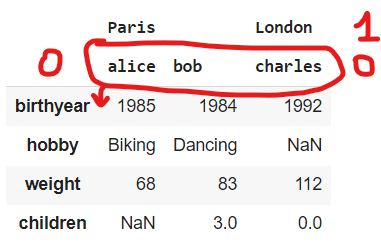

In [65]:
d7 = d6.stack()
d7

Paris London
birthyear alice       1985    NaN
          bob         1984    NaN
          charles      NaN   1992
hobby     alice     Biking    NaN
          bob      Dancing    NaN
weight    alice         68    NaN
          bob           83    NaN
          charles      NaN    112
children  bob          3.0    NaN
          charles      NaN    0.0

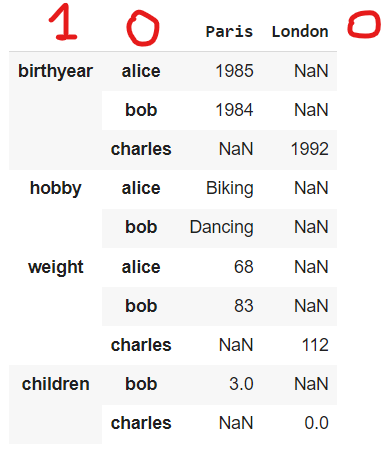

Можна помітити, що з'явилось багато значень `NaN`. Має сенс, адже багато нових комбінацій не існувало раніше (наприклад, не було `bob` в `London`).

Виклик методу `unstack()` зробить оберенене, знову створивши багато значень `NaN`:

In [66]:
d8 = d7.unstack()
d8

Paris                  London             
            alice      bob charles  alice  bob charles
birthyear    1985     1984     NaN    NaN  NaN    1992
children      NaN      3.0     NaN    NaN  NaN     0.0
hobby      Biking  Dancing     NaN    NaN  NaN     NaN
weight         68       83     NaN    NaN  NaN     112

Якщо викликати метод `unstack()` іще раз, ми отримаємо об'єкт `Series`:

In [67]:
d9 = d8.unstack()
d9

Paris   alice    birthyear       1985
                 children         NaN
                 hobby         Biking
                 weight            68
        bob      birthyear       1984
                 children         3.0
                 hobby        Dancing
                 weight            83
        charles  birthyear        NaN
                 children         NaN
                 hobby            NaN
                 weight           NaN
London  alice    birthyear        NaN
                 children         NaN
                 hobby            NaN
                 weight           NaN
        bob      birthyear        NaN
                 children         NaN
                 hobby            NaN
                 weight           NaN
        charles  birthyear       1992
                 children         0.0
                 hobby            NaN
                 weight           112
dtype: object

Методи `stack()` та `unstack()` дозволяють обирати `level` для складання/розкладання (stack/unstack). Складати/розкладати можна навіть декілька рівнів за раз:

In [68]:
d10 = d9.unstack(level = (0, 1))
d10

Paris                  London             
            alice      bob charles  alice  bob charles
birthyear    1985     1984     NaN    NaN  NaN    1992
children      NaN      3.0     NaN    NaN  NaN     0.0
hobby      Biking  Dancing     NaN    NaN  NaN     NaN
weight         68       83     NaN    NaN  NaN     112

## Більшість методів повертає модифіковані копії

Як можна було помітити, методи `stack()` та `unstack()` не змінюють об'єкти, на яких їх було викликано. Натомість, вони працюють на копії та повертають копію. Це справджується для більшості методів в pandas.

## Отримання доступу до рядків (accessing rows)

Повернімось до `DataFrame` `people`:

In [69]:
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


Атрибут `loc` дозволяє отримати доступ до рядків замість колонок. Результатом є об'єкт `Series`, в якому імена колонок (column names) `DataFrame`у стають (mapped) index labels рядків:

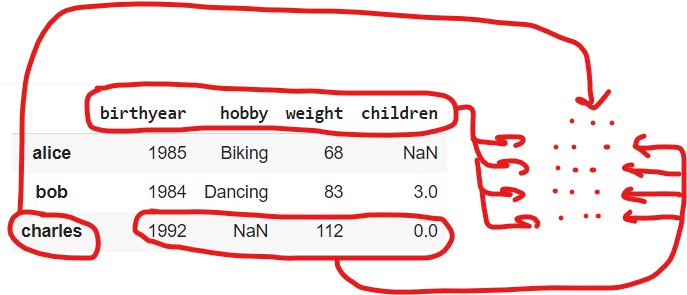

In [70]:
people.loc['charles']

,charles
birthyear,1992
hobby,NaN
weight,112
children,0.0


Доступ до рядків також можна отримати за допомогою числового розташування (integer location) використовуючи атрибут `iloc`:

In [71]:
people.iloc[2]

,charles
birthyear,1992
hobby,NaN
weight,112
children,0.0


Отримати також можна і зріз (slice) рядків. Це поверне об'єкт `DataFrame`:

In [72]:
people.iloc[1:3]

,birthyear,hobby,weight,children
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


Також можна надавати булеановий масив, щоб отримати підходящі рядки:

In [73]:
people[np.array([True, False, True])]

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
charles,1992,NaN,112,0.0


Це найбільш корисно в поєднанні з булеановими виразами:

In [74]:
people[people['birthyear'] < 1990]

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0


## Додавання та видалення колонок

Оскільки до об'єктів `DataFrame` можна ставитись як до словника з `Series`, наступні команди працюють чудово:

In [75]:
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


In [76]:
people['age'] = 2018 - people['birthyear'] # додавання нової колонки "age"
people['over 30'] = people['age'] > 30     # додавання іншої колонки "over 30"
birthyears = people.pop('birthyear')
del people['children']

people

,hobby,weight,age,over 30
alice,Biking,68,33,True
bob,Dancing,83,34,True
charles,NaN,112,26,False


In [77]:
birthyears

,birthyear
alice,1985
bob,1984
charles,1992


При додаванні нової колонки, вона повинна мати таку ж кількість рядків, як і вже існуючі. Пропущені рядки заповнюються `NaN`, а додаткові (екстра) рядки ігноруються:

In [78]:
people['pets'] = pd.Series({'bob': 0, 'charles': 5, 'eugene': 1}) # alice немає, eugene проігноровано
people

,hobby,weight,age,over 30,pets
alice,Biking,68,33,True,NaN
bob,Dancing,83,34,True,0.0
charles,NaN,112,26,False,5.0


При додаванні нової колонки, вона додається в кінець (справа) за замовчуванням. Але вставити (insert) колонку можна куди-небудь, використавши метод `insert()`:

In [79]:
people.insert(1, 'height', [172, 181, 185])
people

,hobby,height,weight,age,over 30,pets
alice,Biking,172,68,33,True,NaN
bob,Dancing,181,83,34,True,0.0
charles,NaN,185,112,26,False,5.0


## Призначення (assigning) нових колонок

Створити нові колонки можна також і за допомогою методу `assign()`. Варто зауважити, що він повертає новий об'єкт `DataFrame`, оригінальний не модифікується:

In [80]:
people.assign(
    body_mass_index = people['weight'] / (people['height'] / 100) ** 2,
    has_pets = people['pets'] > 0
)

,hobby,height,weight,age,over 30,pets,body_mass_index,has_pets
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,False
charles,NaN,185,112,26,False,5.0,32.724617,True


Варто зауважити, що **НЕ МОЖНА** отримати доступ до колонок, які створюються в тому ж самому `assign()`:

In [81]:
try:
  people.assign(
      body_mass_index = people['weight'] / (people['height'] / 100) ** 2,
      overweight = people['body_mass_index'] > 25
  )
except KeyError as e:
  print('Key error:', e)

Key error: 'body_mass_index'


Вирішенням є розділення призначення на два послідовних призначення (consecutive assignments):

In [82]:
d6 = people.assign(body_mass_index = people['weight'] / (people['height'] / 100) ** 2)
d6.assign(overweight = d6['body_mass_index'] > 25)

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,True
charles,NaN,185,112,26,False,5.0,32.724617,True


Потреба створювати тимчасову змінну `d6` не є дуже зручно. Можна було б використати ланцюгове призначення (chain assignment), але це не спрацює, адже об'єкт `people` насправді не модифікується першим призначенням:

In [83]:
try:
  (people
      .assign(body_mass_index = people['weight'] / (people['height'] / 100) ** 2)
      .assign(overweight = people['body_mass_index'] > 25)
  )
except KeyError as e:
  print('Key error:', e)

Key error: 'body_mass_index'


Але боятися не варто - є просте рішення. Методу `assign()` можна передавати функції (зазвичай `lambda` функції), і ця функція буде викликана з `DataFrame` як її параметром:

In [84]:
(people
      .assign(body_mass_index = lambda df: df['weight'] / (df['height'] / 100) ** 2)
      .assign(overweight = lambda df: df['body_mass_index'] > 25)
  )

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,True
charles,NaN,185,112,26,False,5.0,32.724617,True


Проблему вирішено!

## Обчислення виразу (evaluating an expression)

Чудова особливість (feature), яка підтримується Pandas - це обчислення виразів. Вона опирається (relies) на бібліотеку `numexpr`, яка має бути встановлена.

In [85]:
people.eval('weight / (height/100) ** 2 > 25')

,0
alice,False
bob,True
charles,True


Вирази призначання (assignment expressions) також підтримуються. Встановимо `inplace=True`, аби напряму змінити `DataFrame`, а не отримати модифіковану копію:

In [86]:
people.eval('body_mass_index = weight / (height/100) ** 2', inplace=True)
people

,hobby,height,weight,age,over 30,pets,body_mass_index
alice,Biking,172,68,33,True,NaN,22.985398
bob,Dancing,181,83,34,True,0.0,25.335002
charles,NaN,185,112,26,False,5.0,32.724617


У виразах можна також використовувати локальні або глобальні змінні, додаючи до них префікс `@`:

In [87]:
overweight_threshold = 30
people.eval('overweight = body_mass_index > @overweight_threshold', inplace=True)
people

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,False
charles,NaN,185,112,26,False,5.0,32.724617,True


## Запити до `DataFrame` (querying a `DataFrame`)

Метод `query()` дозволяє фільтрувати `DataFrame`, базуючись на виразі в запиті:

In [88]:
people.query('age > 30 and pets == 0')

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
bob,Dancing,181,83,34,True,0.0,25.335002,False


## Сортування `DataFrame`

Відсортувати `DataFrame` можна викликавши метод `sort_index`. За замовчуванням, він сортує рядки, базуючись на їхніх index label, в зростаючому (ascending) порядку. В прикладі інвертуємо порядок:

In [89]:
people.sort_index(ascending=False)

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
charles,NaN,185,112,26,False,5.0,32.724617,True
bob,Dancing,181,83,34,True,0.0,25.335002,False
alice,Biking,172,68,33,True,NaN,22.985398,False


Варто зауважити, що `sort_index` повернув відсортовану *копію* `DataFrame`. Щоб напряму змінити `people`, ми можемо встановити аргумент `inplace` на `True`. Також можа сортувати колонки, а не рядки, встановивши аргумент `axis=1`:

In [90]:
people.sort_index(axis=1, inplace=True)
people

,age,body_mass_index,height,hobby,over 30,overweight,pets,weight
alice,33,22.985398,172,Biking,True,False,NaN,68
bob,34,25.335002,181,Dancing,True,False,0.0,83
charles,26,32.724617,185,NaN,False,True,5.0,112


Щоб відсортувати `DataFrame` за значеннями, а не мітками (labels), можна використати `sort_values` і уточнити колонку, по якій він має сортувати:

In [91]:
people.sort_values(by='age', inplace=True)
people

,age,body_mass_index,height,hobby,over 30,overweight,pets,weight
charles,26,32.724617,185,NaN,False,True,5.0,112
alice,33,22.985398,172,Biking,True,False,NaN,68
bob,34,25.335002,181,Dancing,True,False,0.0,83


## Побудова графіка до `DataFrame` (plotting a `DataFrame`)

Точно так само, як і `Series`, Pandas дозволяє доволі просто побудувати гарний графік, базуючись на `DataFrame`.

Наприклад, досі тривіально створити лінійний графік з даних `DataFrame`, викликавши метод `plot`:

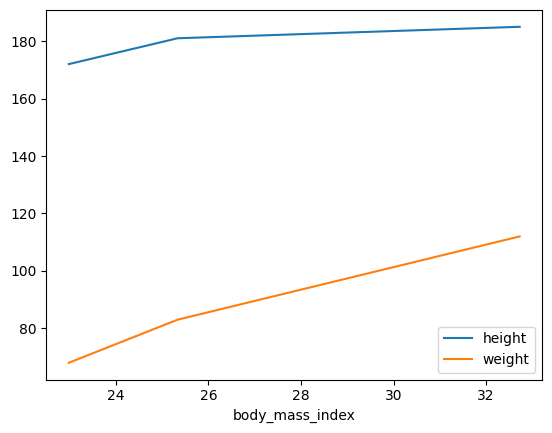

In [92]:
people.sort_values(by='body_mass_index', inplace=True)
people.plot(kind='line', x='body_mass_index', y=['height', 'weight'])
plt.show()

Можна надавати додаткові аргументи, які підтримуються функціями matplotlib. Наприклад, можна створити графік розсіювання (scatterplot) і надати йому список розмірів, використовуючи аргумент `s` з функції matplotlib `scatter()`:

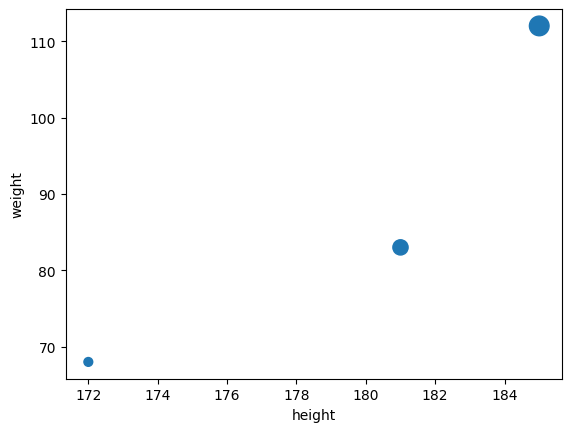

In [93]:
people.plot(kind='scatter', x='height', y='weight', s=[40, 120, 200])
plt.show()

Знову-таки, тут існує дуже багато різних опцій. Всі вони є на сторінці [Візуалізація](https://www.google.com/url?q=https%3A%2F%2Fpandas.pydata.org%2Fpandas-docs%2Fstable%2Fuser_guide%2Fvisualization.html) в документації pandas.

## Операції над `DataFrame`ами

Незважаючи на те, що `DataFrame`и не намагаються мімікувати масиви NumPy, вони все одно дещо схожі. Створимо `DataFrame`, щоб це продемонструвати:

In [94]:
grades_array = np.array([[8, 8, 9], [10, 9, 9], [4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=['sep', 'oct', 'nov'], index=['alice', 'bob', 'charles', 'darwin'])
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


Математичні функції NumPy можна застосовувати над *DataFrame*: функція застосовується до всіх значень:

In [95]:
np.sqrt(grades)

,sep,oct,nov
alice,2.828427,2.828427,3.000000
bob,3.162278,3.000000,3.000000
charles,2.000000,2.828427,1.414214
darwin,3.000000,3.162278,3.162278


Так само, додавання лише одного значення до `DataFrame` додасть це значення до всіх елементів в `DataFrame`. Це називається *бродкастингом (broadcasting)*:

In [96]:
grades + 1

,sep,oct,nov
alice,9,9,10
bob,11,10,10
charles,5,9,3
darwin,10,11,11


Звичайно ж, це справджується і для усіх бінарних операцій, включаючи арифметичні (`*`, `/`, `**` ...) та умовні (`>`, `==` ...) операції:

In [97]:
grades >= 5

,sep,oct,nov
alice,True,True,True
bob,True,True,True
charles,False,True,False
darwin,True,True,True


Агрегаційні операції (aggregation operations), як от обрахування `max`, `sum` або `mean` `DataFrame`у, застосовуються до кожної колонки, а на виході видає об'єкт `Series`:

In [98]:
grades.mean()

,0
sep,7.75
oct,8.75
nov,7.50


Метод `all` також є агрегаційною операцією: вона перевіряє, чи всі значення є `True` або ні. Подивимось, в які місяця всі студенти отримати оцінки більше, ніж `5`:

In [99]:
(grades > 5).all()

,0
sep,False
oct,True
nov,False


Більшість цих функції приймають опціональний параметр `axis`, який дозволяє уточнювати по якій осі `DataFrame`у необхідно виконати операцію. За замовчуванням `axis=0`. Це значить, що операції виконуються вертикально (на кожній колонці). Можна встановити `axis=1`, щоб вконувати операції горизонтально (на кожному рядку). Наприклад, знайдемо який студент мав усі оцінки більші, ніж `5`:

In [100]:
(grades > 5).all(axis=1)

,0
alice,True
bob,True
charles,False
darwin,True


Метод `any` повертає `True`, якщо хоча б одне зі значень є `True`. Переглянемо, хто отримав хоча б одну оцінку `10`:

In [101]:
(grades == 10).any(axis=1)

,0
alice,False
bob,True
charles,False
darwin,True


Якщо додати об'єкт `Series` до `DataFrame` (або виконати будь-яку іншу бінарну операцію), Pandas спробує розтягнути (broadcast) операцію на всі *рядки* в `DataFrame`. Це працює лише, якщо `Series` має однаковий розмір з рядками `DataFrame`у. Наприклад, віднімемо `mean` `DataFrame`у (об'єкт `Series`) з `DataFrame`:

In [102]:
grades - grades.mean() # те саме, що і grades - [7.75, 8.75, 7.50]

,sep,oct,nov
alice,0.25,-0.75,1.5
bob,2.25,0.25,1.5
charles,-3.75,-0.75,-5.5
darwin,1.25,1.25,2.5


Ми відняли `7.75` від усіх оцінок Вересня, `8.75` від усіх оцінок Жовтня та `7.50` від усіх оцінок Листопада. Це еквівалентно до віднімання цього `DataFrame`у:

In [103]:
pd.DataFrame([[7.75, 8.75, 7.50]]*4, index=grades.index, columns=grades.columns)

,sep,oct,nov
alice,7.75,8.75,7.5
bob,7.75,8.75,7.5
charles,7.75,8.75,7.5
darwin,7.75,8.75,7.5


Якщо потрібно відняти глобальне середнє значення (mean) від кожної оцінки, це можна зробити наступним чином:

In [104]:
grades - grades.values.mean() # віднімає глобальне середнє значення (mean), 8.00, від усіх оцінок

,sep,oct,nov
alice,0.0,0.0,1.0
bob,2.0,1.0,1.0
charles,-4.0,0.0,-6.0
darwin,1.0,2.0,2.0


## Автоматичне вирівнювання (automatic alignment)

Схоже до `Series`, при роботі над декількома `DataFrame`ами, Pandas автоматично вирівняє їх по їхнім рядковим index labels, але також і по іменам колонок. Створимо `DataFrame` з бонусними балами для кожної персони з Жовтня по Грудень:

In [105]:
bonus_array = np.array([[0, np.nan, 2], [np.nan, 1, 0], [0, 1, 0], [3, 3, 0]])
bonus_points = pd.DataFrame(bonus_array, columns=['oct', 'nov', 'dec'], index=['bob', 'colin', 'darwin', 'charles'])
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [106]:
grades + bonus_points

,dec,nov,oct,sep
alice,NaN,NaN,NaN,NaN
bob,NaN,NaN,9.0,NaN
charles,NaN,5.0,11.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,NaN


Виглядає так, ніби додавання спрацювало лише в деяких випадках, але тепер занадто багато елементів пусті. Це через те, що при вирівнювання `DataFrame`у, деякі колонки та рядки представлені лише з одного боку, тому вони вважаються відсутніми з іншого (`NaN`). А додавання `NaN` до числа результує у `NaN`. Звідси й результат.

## Робота з відсутніми даними (handling missing data)

Робота з відсутніми даними - це дуже часте завдання під час роботи з реальними даними. Pandas пропонує деякі інструменти для цієї задачі.

Спробуємо виправити проблему зверху. Наприклад, ми можемо вирішити, що пропущені дані мають результувати в нуль, замість `NaN`. Ми можемо замінити всі значення `NaN` на будь-яке значення, використовуючи метод `fillna()`:

In [107]:
(grades + bonus_points).fillna(0)

,dec,nov,oct,sep
alice,0.0,0.0,0.0,0.0
bob,0.0,0.0,9.0,0.0
charles,0.0,5.0,11.0,0.0
colin,0.0,0.0,0.0,0.0
darwin,0.0,11.0,10.0,0.0


Трохи несправедливо, що ми встановлюємо оцінки Вересня на `0`. Можливо, нам краще було б вирішити, що відсутні оцінки - це відсутні оцінки, але відсутні бонуси мають бути змінені на `0`:

In [108]:
fixed_bonus_points = bonus_points.fillna(0)
fixed_bonus_points.insert(0, 'sep', 0)
fixed_bonus_points.loc['alice'] = 0
grades + fixed_bonus_points

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,9.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0


Це набагато краще: незважаючи на те, що ми просто додали вигадані дані, ми не були занадто несправедливими.

Інший шлях роботи з відсутніми даними - інтерполяція (interpolation). Подивимось знову на `DataFrame` `bonus_points`:

In [109]:
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


Тепер викличемо метод `interpolate`. За замовчуванням, він інтерполює вертикально (`axis=0`), тому давайте скажемо йому інтерполювати горизонтально (`axis=1`):

In [110]:
bonus_points.interpolate(axis=1)

,oct,nov,dec
bob,0.0,1.0,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


Боб мав `0` бонусних балів в Жовтні та `2` у Грудні. Коли ми інтерполюємо для Листопада, ми отримуємо середнє значення (mean): `1` бонусний бал. Колів мав 1 бонусний бал в Листопаді, але ми не знаємо, скільки бонусних балів він мав в Вересні, тому ми не можемо інтерполювати, тому в Жовтні і досі є відсутнє значення після інтерполяції. Щоб виправити це, ми можемо встановити бонусні бали Вересня на `0` перед інтерполюванням:

In [111]:
better_bonus_points = bonus_points.copy()
better_bonus_points.insert(0, 'sep', 0)
better_bonus_points.loc['alice'] = 0
better_bonus_points = better_bonus_points.interpolate(axis=1)
better_bonus_points

,sep,oct,nov,dec
bob,0.0,0.0,1.0,2.0
colin,0.0,0.5,1.0,0.0
darwin,0.0,0.0,1.0,0.0
charles,0.0,3.0,3.0,0.0
alice,0.0,0.0,0.0,0.0


Чудово, тепер ми маємо нормальні бонусні бали всюди. Тепер можна знайти й фінальні оцінки:

In [112]:
grades + better_bonus_points

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,10.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0


Дещо дратівливо те, що колонка Вересня опиняється справа. Це через те, що обидва `DataFrame`и, які ми додаємо, мають різну кількість колонок (`DataFrame` `grades` не має колонки `'dec'`), тому щоб зробити речі передбачуваними, Pandas відпорядковує фінальні колонки в алфавітному порядку. Щоб виправити це, ми можемо просто додати відсуню колонку перед додаванням:

In [113]:
grades['dec'] = np.nan
final_grades = grades + better_bonus_points
final_grades

,sep,oct,nov,dec
alice,8.0,8.0,9.0,NaN
bob,10.0,9.0,10.0,NaN
charles,4.0,11.0,5.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,9.0,10.0,11.0,NaN


Ми небагато можемо зробити з Груднем та Коліном: і так досить погано, що ми вигадували бонусні бали, але ми вже не можемо вигадати прийнятні оцінки. Тому викличемо метод `dropna()`, щоб позбутись рядків, які повні `NaN`:

In [114]:
final_grades_clean = final_grades.dropna(how='all')
final_grades_clean

,sep,oct,nov,dec
alice,8.0,8.0,9.0,NaN
bob,10.0,9.0,10.0,NaN
charles,4.0,11.0,5.0,NaN
darwin,9.0,10.0,11.0,NaN


Тепер видалимо колонки, які повні `NaN`, встановивши аргумент `axis` на `1`:

In [115]:
final_grades_clean = final_grades_clean.dropna(axis=1, how='all')
final_grades_clean

,sep,oct,nov
alice,8.0,8.0,9.0
bob,10.0,9.0,10.0
charles,4.0,11.0,5.0
darwin,9.0,10.0,11.0


## Агрегування з `groupby`

Схоже до мови SQL, Pandas дозволяє групувати дані в групки, аби проводити обрахунки над кожною групою.

Спершу додамо деякі додаткові дані про кожну людину, аби потім можна було їх групувати. А також повернемось до `DataFrame`у `final_grades`, аби побачити, як операції проводяться над значеннями `NaN`:

In [116]:
final_grades['hobby'] = ['Biking', 'Dancing', np.nan, 'Dancing', 'Biking']
final_grades

,sep,oct,nov,dec,hobby
alice,8.0,8.0,9.0,NaN,Biking
bob,10.0,9.0,10.0,NaN,Dancing
charles,4.0,11.0,5.0,NaN,NaN
colin,NaN,NaN,NaN,NaN,Dancing
darwin,9.0,10.0,11.0,NaN,Biking


Тепер згрупуємо дані в цьому `DataFrame` по хобі:

In [117]:
grouped_grades = final_grades.groupby('hobby')
grouped_grades

А тепер все готово для того, аби порахувати середню оцінку для кожного з хобі:

In [118]:
grouped_grades.mean()

,sep,oct,nov,dec
hobby,,,,
Biking,8.5,9.0,10.0,NaN
Dancing,10.0,9.0,10.0,NaN


Це було просто! Варто зауважити, що значення `NaN` були просто пропущені при обрахуванні середнього значення.

## Зведені таблиці (pivot tables)

Pandas підтримує [зведені таблиці](https://en.wikipedia.org/wiki/Pivot_table), подібні до електронних таблиць (spreadsheet-like pivot tables), які дозволяють швидко узагальнювати дані. Щоб це проілюструвати, створимо просний `DataFrame`:

In [119]:
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [120]:
more_grades = final_grades_clean.stack().reset_index()
more_grades.columns = ['name', 'month', 'grade']
more_grades['bonus'] = [np.nan, np.nan, np.nan, 0, np.nan, 2, 3, 3, 0, 0, 1, 0]
more_grades

,name,month,grade,bonus
0,alice,sep,8.0,NaN
1,alice,oct,8.0,NaN
2,alice,nov,9.0,NaN
3,bob,sep,10.0,0.0
4,bob,oct,9.0,NaN
5,bob,nov,10.0,2.0
6,charles,sep,4.0,3.0
7,charles,oct,11.0,3.0
8,charles,nov,5.0,0.0
9,darwin,sep,9.0,0.0


Тепер можна викликати функцію `pd.pivot_table()` для цього `DataFrame`, запитуючи про групування по колонці `name`. За замовчуванням, `pivot_table()` обраховує середнє значення для кожної чисельної колонки:

In [121]:
pd.pivot_table(more_grades[['name', 'grade', 'bonus']], index='name')

,bonus,grade
name,,
alice,NaN,8.333333
bob,1.000000,9.666667
charles,2.000000,6.666667
darwin,0.333333,10.000000


Функцію агрегації можна змінити, встановивши аргумент `aggfunc`, і ми також можемо уточнити список колонок, чиї значення будуть агреговані:

In [122]:
pd.pivot_table(more_grades, index='name', values=['grade', 'bonus'], aggfunc='max')

,bonus,grade
name,,
alice,NaN,9.0
bob,2.0,10.0
charles,3.0,11.0
darwin,1.0,11.0


Ми також можемо вказати стовпці для агрегування по горизонталі і запросити загальні підсумки для кожного рядка і стовпця, встановивши значення `margins=True`:

In [123]:
pd.pivot_table(more_grades, index='name', values='grade', columns='month', margins=True)

month,nov,oct,sep,All
name,,,,
alice,9.00,8.0,8.00,8.333333
bob,10.00,9.0,10.00,9.666667
charles,5.00,11.0,4.00,6.666667
darwin,11.00,10.0,9.00,10.000000
All,8.75,9.5,7.75,8.666667


Ми також можемо уточнити декілька індекстів або імен колонок, і Pandas створить багаторівневі (multi-level) індекси:

In [124]:
pd.pivot_table(more_grades, index=('name', 'month'), margins=True)

bonus  grade
name    month              
alice   nov      NaN   9.00
        oct      NaN   8.00
        sep      NaN   8.00
bob     nov    2.000  10.00
        oct      NaN   9.00
        sep    0.000  10.00
charles nov    0.000   5.00
        oct    3.000  11.00
        sep    3.000   4.00
darwin  nov    0.000  11.00
        oct    1.000  10.00
        sep    0.000   9.00
All            1.125   8.75

## Оглядові функції (overview functions)

При роботі з великими `DataFrame`ами, стає у нагоді швидко оглянути їхній вміст. Pandas має декілька функцій для цього. Спершу створимо великий `DataFrame`, який є міксом з чисельних, відсутніх та текстових значень. Варто зауважити, як Jupyter відображає лише краї `DataFrame`у:

In [133]:
much_data = np.fromfunction(lambda x, y: (x+y*y)%17*11, (10000, 26))
large_df = pd.DataFrame(much_data, columns=list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))
large_df[large_df % 16 == 0] = np.nan
large_df.insert(3, "some_text", "Blabla")
large_df

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,33.0,Blabla,88.0,165.0,77.0,11.0,154.0,132.0,...,NaN,NaN,NaN,33.0,88.0,165.0,77.0,11.0,154.0,132.0
9996,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
9997,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
9998,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0


Метод `head()` повертає `5` верхніх рядків:

In [134]:
large_df.head()

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN


Звичайно ж, існує й функця `tail()`, за допомогою якої можна переглянути `5` нижніх рядків. Їй та методу `head()` можна надати кількість рядків, які треба переглянути:

In [137]:
large_df.tail(n=2)

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
9998,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
9999,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN


Метод `info()` надає короткий підсумок (summary) для вмісту кожної колонки:

In [138]:
large_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          8823 non-null   float64
 1   B          8824 non-null   float64
 2   C          8824 non-null   float64
 3   some_text  10000 non-null  object 
 4   D          8824 non-null   float64
 5   E          8822 non-null   float64
 6   F          8824 non-null   float64
 7   G          8824 non-null   float64
 8   H          8822 non-null   float64
 9   I          8823 non-null   float64
 10  J          8823 non-null   float64
 11  K          8822 non-null   float64
 12  L          8824 non-null   float64
 13  M          8824 non-null   float64
 14  N          8822 non-null   float64
 15  O          8824 non-null   float64
 16  P          8824 non-null   float64
 17  Q          8824 non-null   float64
 18  R          8823 non-null   float64
 19  S          8824 non-null   float64
 20  T      

Метод `describe()` надає гарний огляд основних агрегованих значень по кожному стовпчику.

За замовчуванням він виведить статистичні показники чисельних (кількісних) даних сету для кожної колонки, де:
* `count`: число не-нулових (not NaN) значень
* `mean`: середнє значення не-нулових значень
* `std`: [середньоквадратичне відхилення](https://www.google.com/url?q=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FStandard_deviation) не-нулових значень
* `min`: мінімум усіх не-нулових значень
* `25%`, `50%`, `75%`: 25а, 50а та 75а третина ([percentile](https://www.google.com/url?q=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FPercentile)) всіх не-нулових значень
* `max`: максимум усіх не-нулових значень

In [139]:
large_df.describe()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
count,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000,8823.000000,...,8824.000000,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000
mean,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441,88.022441,...,87.972575,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441
std,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911,47.535911,...,47.535523,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911
min,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
25%,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
50%,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
75%,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
max,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000


Для отримання статистичних показників текстових даних можна надати методу аргумент `include=[object]` (для кількісних - `include=['float64']`).

В результаті, для кожної колонки:
* `count`: кількість непорожніх значень в колонці
* `unique`: кількість унікальних значень
* `top`: найбільш популярне значення
* `freq`: частота, з якою зустрічається найбільш популярне значення


In [140]:
large_df.describe(include=[object])

,some_text
count,10000
unique,1
top,Blabla
freq,10000


# Збереження та завантаження (saving and loading)

Pandas може зберігати `DataFrame`и до різних бекендів, включаючи такі формати як CSV, Excel, JSON, HTML та HDF6 або в базу даних SQL. Створимо `DataFrame`, щоб це продемонструвати:

In [141]:
my_df = pd.DataFrame(
    [['Biking', 68.5, 1985, np.nan], ['Dancing', 83.1, 1984, 3]],
    columns=['hobby', 'weight', 'bithyear', 'children'],
    index=['alice', 'bob']
)
my_df

,hobby,weight,bithyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


## Збереження

Збережемо його до CSV, HTML та JSON:

In [142]:
my_df.to_csv('my_df.csv')
my_df.to_html('my_df.html')
my_df.to_json('my_df.json')

Готово! Подивимось на те, що було збережено:

In [143]:
from pathlib import Path

for filename in ('my_df.csv', 'my_df.html', 'my_df.json'):
  print('#', filename)
  print(Path(filename).read_text())
  print()

# my_df.csv
,hobby,weight,bithyear,children
alice,Biking,68.5,1985,
bob,Dancing,83.1,1984,3.0


# my_df.html
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>hobby</th>
      <th>weight</th>
      <th>bithyear</th>
      <th>children</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>alice</th>
      <td>Biking</td>
      <td>68.5</td>
      <td>1985</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>bob</th>
      <td>Dancing</td>
      <td>83.1</td>
      <td>1984</td>
      <td>3.0</td>
    </tr>
  </tbody>
</table>

# my_df.json
{"hobby":{"alice":"Biking","bob":"Dancing"},"weight":{"alice":68.5,"bob":83.1},"bithyear":{"alice":1985,"bob":1984},"children":{"alice":null,"bob":3.0}}



Варто зауважити, що індекс було збережено як перша колонка в файлі CSV, як тег `<th>` в HTML і як ключі в JSON. Колонка індексів не має імені за умовчанням, але це можна змінити, встановивши `my_df.index.name` на будь-яку назву.

Збереження в інші формати працює дуже схоже, але деякі з форматів вимагають деякі додаткові бібліотеки. Наприклад, збереження в Excel вимагає бібліотеку `openpyxl`:

In [144]:
try:
  my_df.to_excel('my_df.xlsx', sheet_name='People')
except ImportError as e:
  print(e)

## Завантаження (loading)

Тепер завантажимо наш файл CSV назад в `DataFrame`:

In [146]:
my_df_loaded = pd.read_csv('my_df.csv', index_col=0)
my_df_loaded

,hobby,weight,bithyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


Очевидно, що існують такоє і функції для інших форматів, як от `read_json`, `read_html` або `read_excel`. Можна також зчитувати дані напряму з Інтернету. Наприклад, завантажимо топ 1000 міст США з GitHub:

In [149]:
us_cities = None
try:
  csv_url = "https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv"
  us_cities = pd.read_csv(csv_url, index_col=0)
  # us_cities = us_cities.head()
except IOError as e:
  print(e)
us_cities

,State,Population,lat,lon
City,,,,
Marysville,Washington,63269,48.051764,-122.177082
Perris,California,72326,33.782519,-117.228648
Cleveland,Ohio,390113,41.499320,-81.694361
Worcester,Massachusetts,182544,42.262593,-71.802293
Columbia,South Carolina,133358,34.000710,-81.034814
...,...,...,...,...
West New York,New Jersey,52122,40.787879,-74.014306
Everett,Massachusetts,42935,42.408430,-71.053663
Linden,New Jersey,41301,40.622048,-74.244590


In [155]:
us_cities['State'].unique().shape # отримання кількості штатів

(51,)

Існує багато доступних опцій, особливо для читання формату datetime. Все є в офіційній [документації](https://www.google.com/url?q=https%3A%2F%2Fpandas.pydata.org%2Fpandas-docs%2Fstable%2Fuser_guide%2Fio.html):

# Об'єднання `DataFrame`ів (combining `DataFrame`s)

## SQL-подібні об'єднання (SQL-like joins)

Одна з потужних особливостей Pandas - це можливість проведення SQL-подібних об'єднань над `DataFrame`ами. Багато різних типів об'єднань підтримуються: внутрішні, праві/ліві, зовнішні та повні (inner, left/right, outer and full joins). Аби це проілюструвати, створимо декілька простих `DataFrame`ів:

In [156]:
city_loc = pd.DataFrame(
    [
        ['CA', 'San Francisco', 37.781334, -122.416728],
        ['NY', 'New York', 40.705649, -74.008344],
        ['FL', 'Miami', 25.791100, -80.320733],
        ['OH', 'Cleveland', 41.473508, -81.739791],
        ['UT', 'Salt Lake City', 40.755851, -111.896657]
    ], columns=['state', 'city', 'lat', 'lng']
)
city_loc

,state,city,lat,lng
0,CA,San Francisco,37.781334,-122.416728
1,NY,New York,40.705649,-74.008344
2,FL,Miami,25.791100,-80.320733
3,OH,Cleveland,41.473508,-81.739791
4,UT,Salt Lake City,40.755851,-111.896657


In [157]:
city_pop = pd.DataFrame(
    [
        [808976, 'San Francisco', 'California'],
        [8363710, 'New York', 'New-York'],
        [413201, 'Miami', 'Florida'],
        [2242193, 'Houston', 'Texas']
    ], index=[3, 4, 5, 6], columns=['population', 'city', 'state']
)
city_pop

,population,city,state
3,808976,San Francisco,California
4,8363710,New York,New-York
5,413201,Miami,Florida
6,2242193,Houston,Texas


Тепер об'єднаємо ці `DataFrame`и, використавши функцію `merge()`:

In [159]:
pd.merge(left=city_loc, right=city_pop, on='city')

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida


Варто зауважити, що обидва `DataFrame`и мають колонки з назвою `state`, тому в результаті їх було перейменовано на `state_x` та `state_y`.

Також варто зауважити, що Cleveland, Salt Lake City та Houston було викинуто (dropped), бо вони не існують в *ОБОХ* `DataFrame`ах. Це еквівалент до SQL `INNER JOIN`. Якщо необхідно провести `FULL OUTER JOIN`, де жодне місто не викинується і значення `NaN` додаються, треба уточнити `how='outer'`:



In [162]:
all_cities = pd.merge(left=city_loc, right=city_pop, on='city', how='outer')
all_cities

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976.0,California
1,NY,New York,40.705649,-74.008344,8363710.0,New-York
2,FL,Miami,25.791100,-80.320733,413201.0,Florida
3,OH,Cleveland,41.473508,-81.739791,NaN,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN,NaN
5,NaN,Houston,NaN,NaN,2242193.0,Texas


Звичайно ж, `LEFT OUTER JOIN` також доступний, якщо встановити `how='left'`: тільки міста, представлені в лівому `DataFrame` опиняться в результаті. Схоже й із `how='right`': тільки міста з правого `DataFrame` будуть в результаті. Наприклад:

In [164]:
pd.merge(left=city_loc, right=city_pop, on='city', how='right')

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida
3,NaN,Houston,NaN,NaN,2242193,Texas


Якщо ключ для приєднання насправді знаходиться в одному (або обох) індексах `DataFrame`, треба використовувати `left_index=True` та/або `right_index=True`. Якщо імена ключових колонок різні, то треба використовувати `left_on` та `right_on`. Наприклад:

In [166]:
city_pop2 = city_pop.copy()
city_pop2.columns = ['population', 'name', 'state']
pd.merge(left=city_loc, right=city_pop2, left_on='city', right_on='name')

,state_x,city,lat,lng,population,name,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,San Francisco,California
1,NY,New York,40.705649,-74.008344,8363710,New York,New-York
2,FL,Miami,25.791100,-80.320733,413201,Miami,Florida


## Concatenation (теж об'єднання, конкатенація)

Замість того, щоб об'єднувати (joining) DataFrameи, ми можемо конкатенувати (concatenate) їх. Функція `concat()` існує для цього:

In [167]:
result_concat = pd.concat([city_loc, city_pop])
result_concat

,state,city,lat,lng,population
0,CA,San Francisco,37.781334,-122.416728,NaN
1,NY,New York,40.705649,-74.008344,NaN
2,FL,Miami,25.791100,-80.320733,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN
3,California,San Francisco,NaN,NaN,808976.0
4,New-York,New York,NaN,NaN,8363710.0
5,Florida,Miami,NaN,NaN,413201.0
6,Texas,Houston,NaN,NaN,2242193.0


Варто зауважити, що ця операція вирівнює дані горизонтально (по колонках), а не вертикально (по рядках). В цьому прикладі, ми моємо декілька рядків з однаковим індексом (`3`). Pandas справляється з цим досить витончено:

In [169]:
result_concat.loc[3]

,state,city,lat,lng,population
3,OH,Cleveland,41.473508,-81.739791,NaN
3,California,San Francisco,NaN,NaN,808976.0


Pandas можна сказати просто ігнорувати індекси:

In [170]:
pd.concat([city_loc, city_pop], ignore_index=True)

,state,city,lat,lng,population
0,CA,San Francisco,37.781334,-122.416728,NaN
1,NY,New York,40.705649,-74.008344,NaN
2,FL,Miami,25.791100,-80.320733,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN
5,California,San Francisco,NaN,NaN,808976.0
6,New-York,New York,NaN,NaN,8363710.0
7,Florida,Miami,NaN,NaN,413201.0
8,Texas,Houston,NaN,NaN,2242193.0


Варто зауважити, що коли колонка не існує в `DataFrame`, вона поводить себе так, ніби вона заповнена значеннями NaN. Якщо встановити `join='inner'`, буде повернуто лише колонки, які існують в *ОБОХ* `DataFrame`ах:

In [171]:
pd.concat([city_loc, city_pop], join='inner')

,state,city
0,CA,San Francisco
1,NY,New York
2,FL,Miami
3,OH,Cleveland
4,UT,Salt Lake City
3,California,San Francisco
4,New-York,New York
5,Florida,Miami
6,Texas,Houston


Конкатенувати `DataFrame`и можна горизонтально, а не вертикально, встановивши `axis=1`:

In [172]:
pd.concat([city_loc, city_pop], axis=1)

,state,city,lat,lng,population,city,state
0,CA,San Francisco,37.781334,-122.416728,NaN,NaN,NaN
1,NY,New York,40.705649,-74.008344,NaN,NaN,NaN
2,FL,Miami,25.791100,-80.320733,NaN,NaN,NaN
3,OH,Cleveland,41.473508,-81.739791,808976.0,San Francisco,California
4,UT,Salt Lake City,40.755851,-111.896657,8363710.0,New York,New-York
5,NaN,NaN,NaN,NaN,413201.0,Miami,Florida
6,NaN,NaN,NaN,NaN,2242193.0,Houston,Texas


В даному випадку це не робить дуже багато сенсу, адже індекси погано вирівнюються (наприклад, Cleveland та San Francisco опиняються на тому ж рядку, адже вони мають однаковий індекс `3`). Тому давайте змінимо індекси `DataFrame`ів на назви міст перед конкатенуванням:

In [173]:
pd.concat([city_loc.set_index('city'), city_pop.set_index('city')], axis=1)

,state,lat,lng,population,state
city,,,,,
San Francisco,CA,37.781334,-122.416728,808976.0,California
New York,NY,40.705649,-74.008344,8363710.0,New-York
Miami,FL,25.791100,-80.320733,413201.0,Florida
Cleveland,OH,41.473508,-81.739791,NaN,NaN
Salt Lake City,UT,40.755851,-111.896657,NaN,NaN
Houston,NaN,NaN,NaN,2242193.0,Texas


Це виглядає більш як `FULL OUTER JOIN`, за винятком того, що колонки `state` не перейменовуються на `state_x` та `state_y`, а колонка `city` тепер є індексом.